In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [143]:
img = np.ones((201, 201), dtype=np.int32) * 255

# Display a grayscale image with scalar data.

In [168]:
def show(img):
    plt.imshow(img, cmap='gray', vmax=255, vmin=0)
    plt.show()

In [145]:
   
'''
         x
  -------------------------->
  |
  |
 y|
  |
  |
  |
  \/
'''

'\n         x\n  -------------------------->\n  |\n  |\n y|\n  |\n  |\n  |\n  \\/\n'

In [146]:
# p1 = (y1, x1), p2 = (y2, x2)
# flag
def draw_line(canvas, p1, p2, color, flag = False):
    if p1[1] > p2[1]:
        p1, p2 = p2, p1
    dy = p2[0] - p1[0]
    dx = p2[1] - p1[1]
    x = int(p1[1])
    y = int(p1[0])
    if dx != 0:
        k = dy / dx
        if k >= 0:
            if k <= 1: # x是长边
                canvas[y, x] = color
                e = dx * -1
                while x < p2[1]:
                    e = e + 2 * dy
                    x = x + 1
                    if e > 0:
                        y = y + 1
                        e = e - 2 * dx
                    else:
                        pass
                        # y = y
                    if flag:
                        # print('\n')
                        # print(p1, p2)
                        # print(p2[1])
                        canvas[y, int(x - 2 * (x - p1[1]))] = color

                    else:
                        canvas[y, x] = color
            else: # y是长边
                canvas[y, x] = color
                e = dy * -1
                while y < p2[0]:
                    e = e + 2 * dx
                    y = y + 1
                    if e > 0:
                        x = x + 1
                        e = e - 2 * dy
                    else:
                        pass
                        # y = y
                    if flag:
                        # print(x)
                        canvas[y, int(x - 2 * (x - p1[1]))] = color
                        # if int(x - p1[1]) < 0:
                        #     print(p1, p2, flag)
                    else:
                        canvas[y, x] = color
        else:
            draw_line(canvas, (y, x + 2 * dx), p2, color, True)
    else: # 垂直x 轴的直线
        step = 1
        if dy < 0:
            step = -1
        
        for i in range(p1[0], p2[0] + step, step):
            canvas[i, p1[1]] = color


# Test draw_line

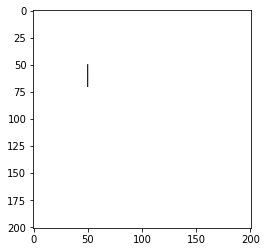

In [147]:
# verticial line
draw_line(img,(70, 50),(50, 50), 0)
show(img)

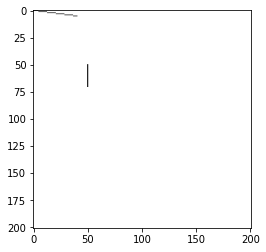

In [148]:
draw_line(img, (0, 0), (5, 40), 100)
show(img)

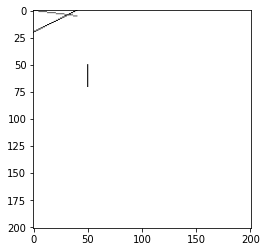

In [149]:
draw_line(img, (20, 0), (0, 40), 0)
show(img)

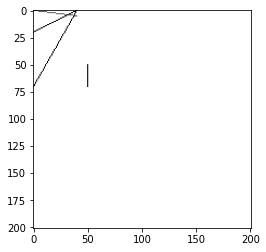

In [150]:
draw_line(img, (70, 0), (0, 40), 0)
show(img)

# Drawing function capable of Accumulating pixel value

In [151]:
def draw_line_acc(canvas, p1, p2, color, flag = False):
    if p1[1] > p2[1]:
        p1, p2 = p2, p1
    dy = p2[0] - p1[0]
    dx = p2[1] - p1[1]
    x = int(p1[1])
    y = int(p1[0])
    if dx != 0:
        k = dy / dx
        if k >= 0:
            if k <= 1: # x是长边
                canvas[y, x] += color
                e = dx * -1
                while x < p2[1]:
                    e = e + 2 * dy
                    x = x + 1
                    if e > 0:
                        y = y + 1
                        e = e - 2 * dx
                    else:
                        pass
                        # y = y
                    if flag:

                        canvas[y, int(x - 2 * (x - p1[1]))] += color

                    else:
                        canvas[y, x] += color
            else: # y是长边
                canvas[y, x] += color
                e = dy * -1
                while y < p2[0]:
                    e = e + 2 * dx
                    y = y + 1
                    if e > 0:
                        x = x + 1
                        e = e - 2 * dy
                    else:
                        pass
                        # y = y
                    if flag:
                        canvas[y, int(x - 2 * (x - p1[1]))] += color

                    else:
                        canvas[y, x] += color
        else:
            draw_line_acc(canvas, (y, x + 2 * dx), p2, color, True)
    else: # 垂直x 轴的直线
        step = 1
        if dy < 0:
            step = -1
        
        for i in range(p1[0], p2[0] + step, step):
            canvas[i, p1[1]] += color

# Test draw_line_acc

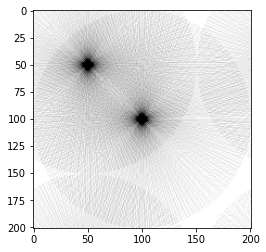

In [153]:
img = np.ones((201, 201)) * 255

c  = (100, 100)
r = 100
dx = 0
dy = 0


for i in range(360):
    draw_line_acc(img, c, (int(c[0] + dx), int(c[1] + dy)), -20)

    dx = round(np.sin(2*np.pi / 360 * i) * r)
    dx = min(dx, r)
    dy = round(np.cos(2*np.pi / 360 * i) * r)
    dy = min(dy, r)


c = (50, 50)
for i in range(360):
    draw_line_acc(img, c, (int(c[0] + dx), int(c[1] + dy)), -20)

    dx = round(np.sin(2*np.pi / 360 * i) * r)
    dx = min(dx, r)
    dy = round(np.cos(2*np.pi / 360 * i) * r)
    dy = min(dy, r)

show(img)


# Create empty canvas

In [156]:
img = np.ones((201, 201)) * 255

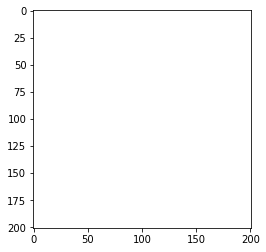

In [157]:
show(img)

# Create circular robs

In [158]:
c  = (100, 100)
r = 100
num = 180
robs = []
for i in range(num):

    dx = round(np.sin(2*np.pi / num * i) * r)
    dx = min(dx, r)
    dy = round(np.cos(2*np.pi / num * i) * r)
    dy = min(dy, r)
    robs.append([c[0] + dy, c[1] + dx])

In [159]:
for p in robs:
    img[p[0], p[1]] = 1

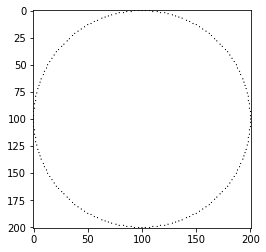

In [160]:
show(img)

# Read target image

In [221]:
r = 100
img_path = "201031032.jpg"
img_o = Image.open(img_path)
img_o = img_o.resize((2*r+1, 2*r+1), Image.ANTIALIAS)

img_o = np.array(img_o)


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img_o = rgb2gray(img_o) 

print(f"loaded image {img_path}, and convert to shape {img_o.shape}")

loaded image 201031032.jpg, and convert to shape (201, 201)


# The original image.

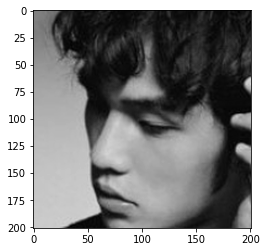

In [311]:
show(img_o)

In [223]:
def distance(object, canvas):
    return np.sqrt(np.sum(np.square(object.flatten() - canvas.flatten())))

In [315]:
def find_one_with(object, canvas, p1):
    ans = ((0,0), (0,0))
    minimum = np.inf
    for p2 in robs:
        if(p1 == p2):
            continue
        tmp = canvas.copy()
        draw_line_acc(tmp, p1, p2, -20)
        tmp[tmp < 0] = 0
        dis = distance(object, tmp)
        
        if dis < minimum:
            minimum = dis
            ans = (p1, p2)
    # print(minimum)
    return ans

In [342]:
img = np.ones((201, 201)) * 255

499
255.0 0.0


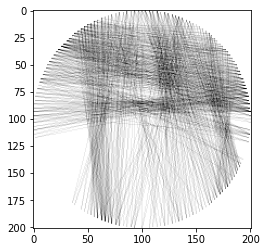

999
255.0 0.0


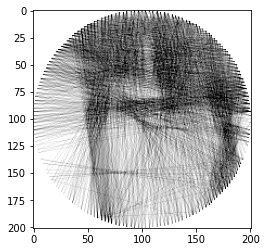

1499
255.0 0.0


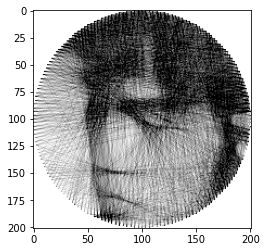

1999
255.0 0.0


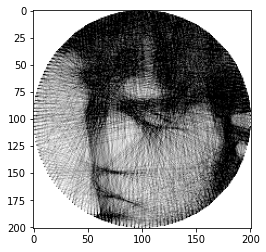

KeyboardInterrupt: 

In [343]:
pre = robs[0]
sequences = []
for i in range(5000):
    sequences.append(pre)
    p1, p2 = find_one_with(img_o, img, pre)
    draw_line_acc(img, p1, p2, -20)
    img[img < 0] = 0
    pre = p2
    # print(p1, p2)
    if (i + 1) % 500 == 0:
        print(i)
        print(np.max(img), np.min(img))
        show(img)
        



In [344]:
sequences = np.array(sequences)

In [345]:
np.save('sequences', sequences)

# Draw with existed sequence

In [346]:
seq  = np.load('sequences.npy')

In [347]:
img = np.ones((201, 201)) * 255

In [348]:
for i in range(seq.shape[0] - 1):
    p1, p2 = seq[i:i+2]
    draw_line_acc(img, p1, p2, -20)
    img[img < 0] = 0



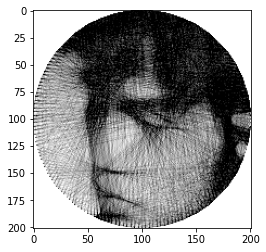

In [349]:
show(img)